In [68]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy import stats
warnings.filterwarnings('ignore')
import seaborn as sns

In [69]:
df=pd.read_csv("SouthGermanCredit.asc",sep=" ")
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


# Change dataframe column names into english  

In [70]:
new_cols=['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex'
         ,'other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable',
         'telephone','foreign_worker','credit_risk']
for x,y in zip(df.columns,new_cols):
    df.rename(columns={x:y},inplace=True)

In [71]:
df.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [72]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [73]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [74]:
dfn=df.copy()

In [75]:
def finding_outliers(data):
    for x in data.columns:
        if data[x].dtype=='int64' or 'float64':
            sns.boxplot(data[x])
            plt.show()
            sns.distplot(data[x])
            plt.show()
            

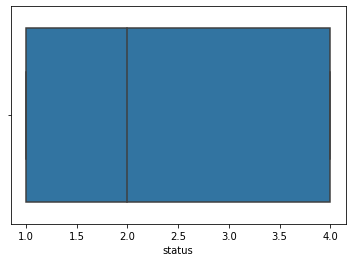

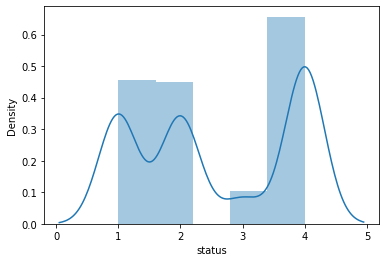

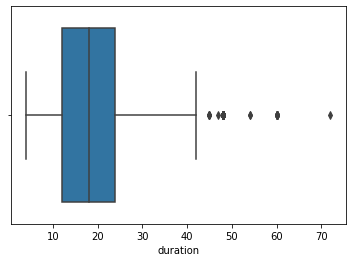

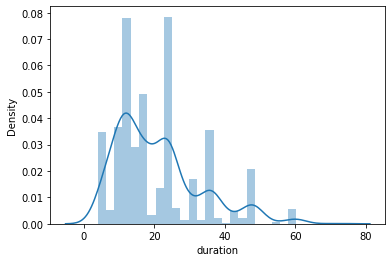

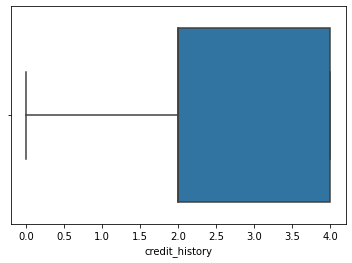

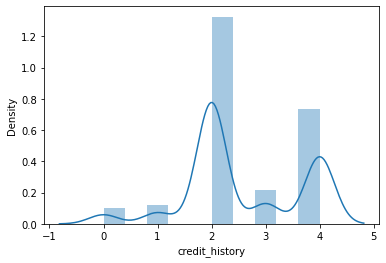

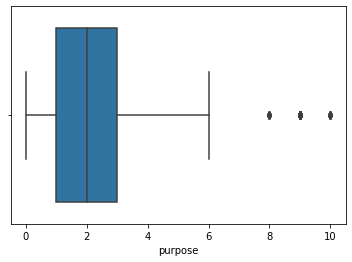

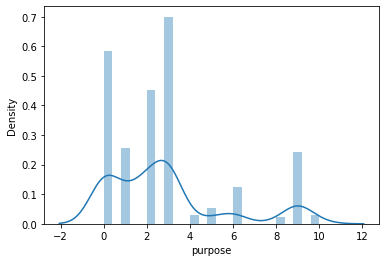

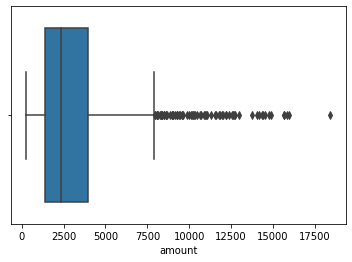

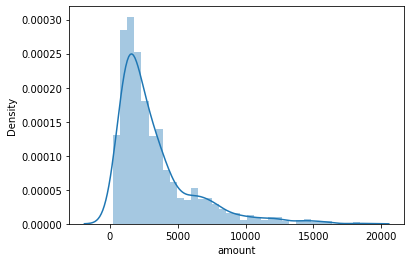

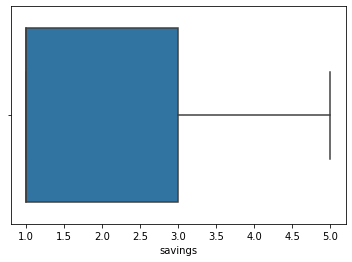

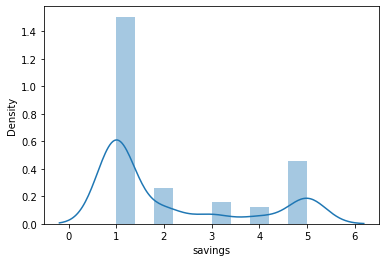

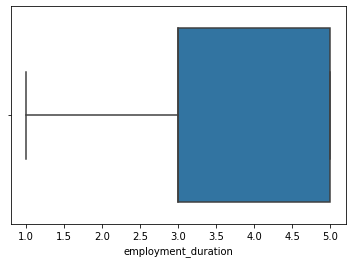

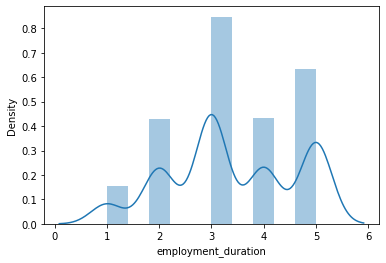

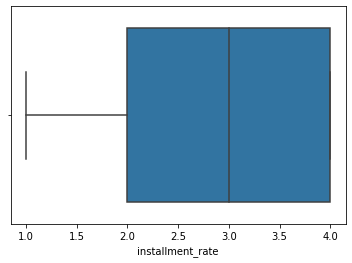

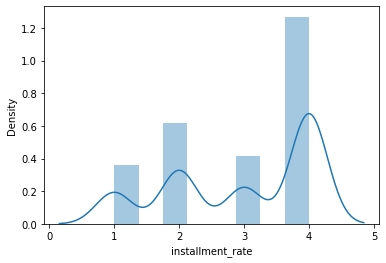

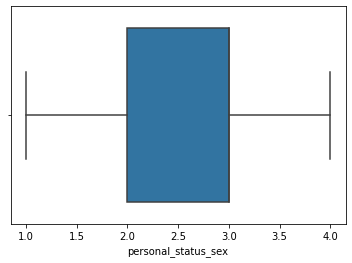

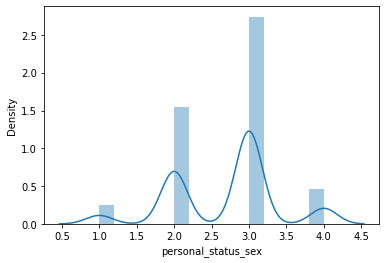

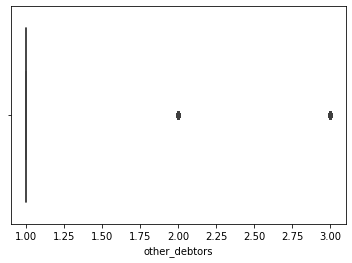

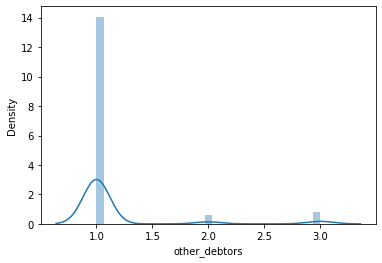

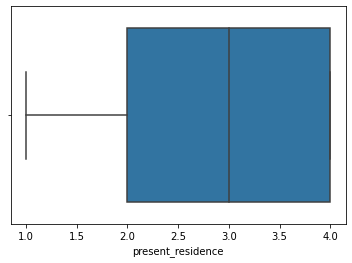

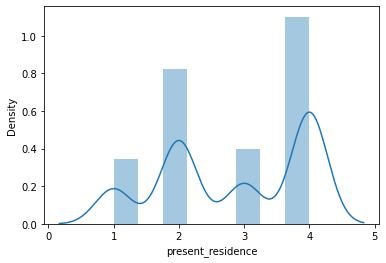

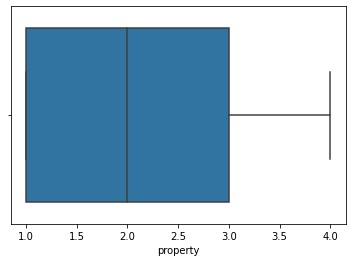

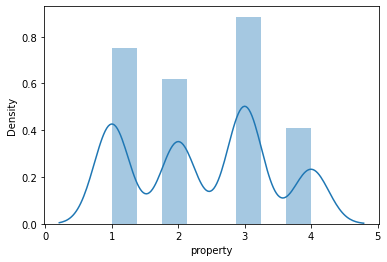

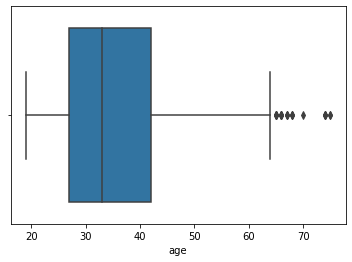

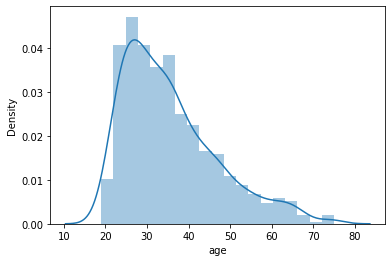

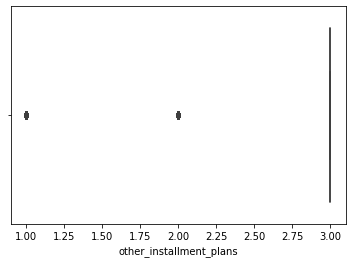

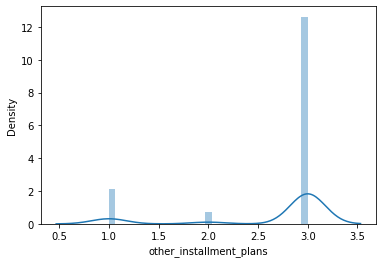

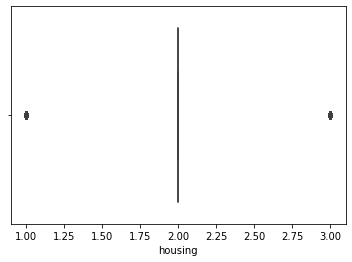

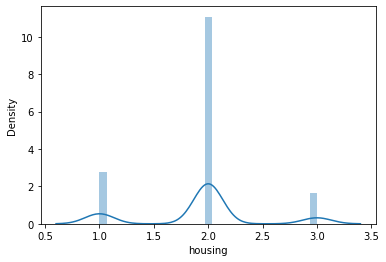

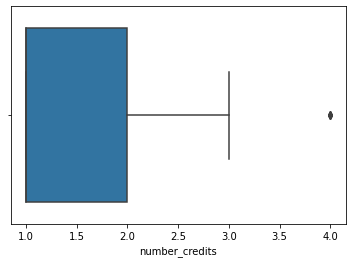

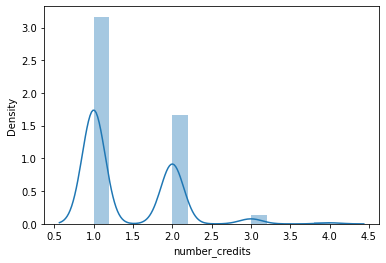

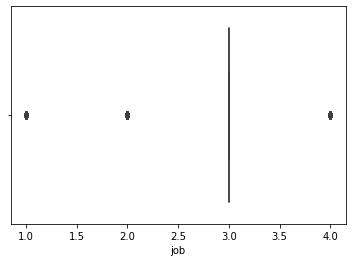

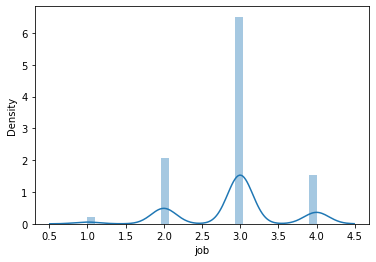

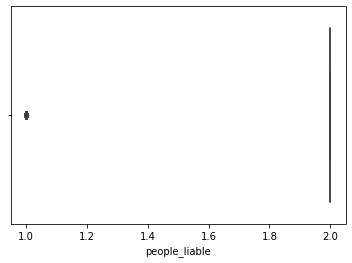

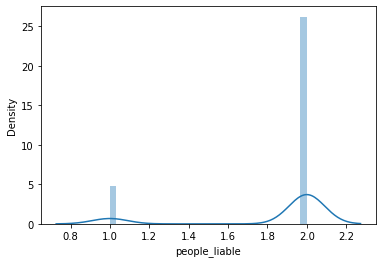

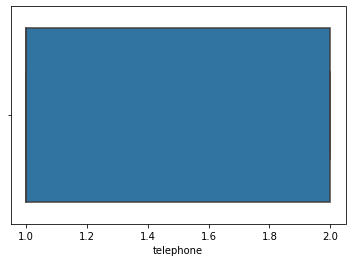

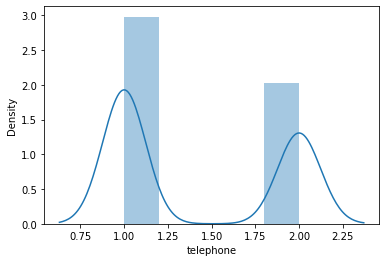

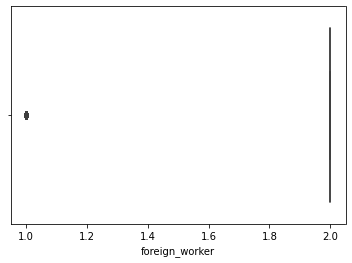

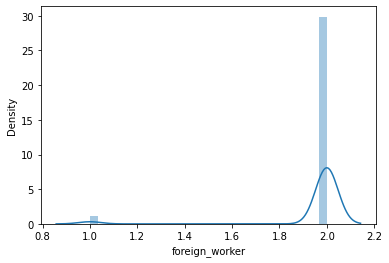

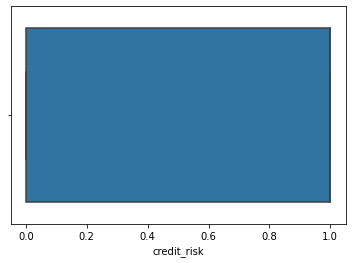

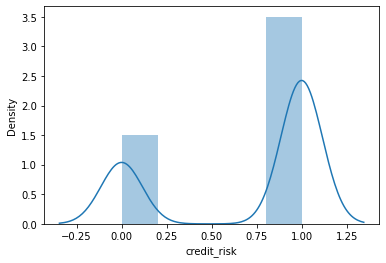

In [76]:
finding_outliers(dfn)

In [77]:
list_cols=['duration','purpose','amount']

In [78]:
dfn.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [79]:
def finding_z_score(data):
    z_score_list=[]
    for x in data:
        if data[x].dtype=='int64' or 'float64':
            z_score=stats.zscore(data[x])
            z_score_list.append(z_score)
            return z_score_list
            

    

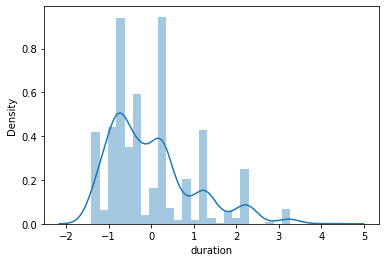

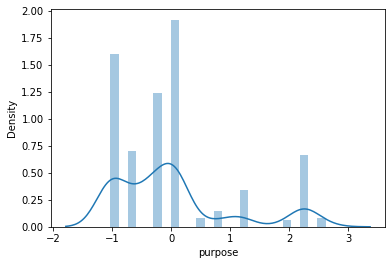

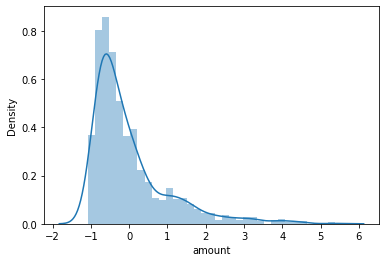

In [80]:
# list_cols=['duration','purpose','amount']
# z_score(dfn['duration'])

for x in list_cols:
    z_score=stats.zscore(dfn[x])
    sns.distplot(z_score)
    plt.show()

In [81]:
finding_z_score(dfn)

[0     -1.254566
 1     -1.254566
 2     -0.459026
 3     -1.254566
 4     -1.254566
          ...   
 995   -1.254566
 996   -1.254566
 997    1.132053
 998   -0.459026
 999   -1.254566
 Name: status, Length: 1000, dtype: float64]

In [82]:
col_list=list(dfn.columns)
# col_list.remove(['credit_risk'])
# dfn.drop(['credit_risk'],axis=1,inplace=True)

In [83]:
dfn.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [84]:
dfn.dtypes

status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object

In [85]:
def iqr(dfn,col_list):
    for col in col_list:
        print(col)
        if(dfn[col].dtype!= object):
            Q1 = dfn[col].quantile(0.25)
            Q3 = dfn[col].quantile(0.75)
            IQR = Q3 - Q1
            S = 1.5*IQR
            LB = Q1 - S
            UB = Q3 + S
            dfn.loc[dfn[col] > UB,col] = UB
            dfn.loc[dfn[col] < LB,col] = LB
            dfn.loc[dfn[col] > UB,col] = UB
            dfn.loc[dfn[col] < LB,col] = LB
        else:
            break
    return dfn

In [86]:
dfn.purpose

0      2
1      0
2      9
3      0
4      0
      ..
995    3
996    0
997    0
998    3
999    2
Name: purpose, Length: 1000, dtype: int64

In [87]:
list_cols

['duration', 'purpose', 'amount']

In [88]:
# iqr(dfn,col_list)

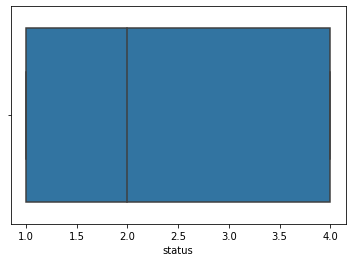

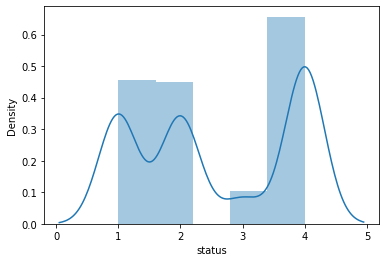

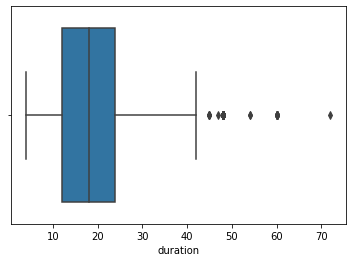

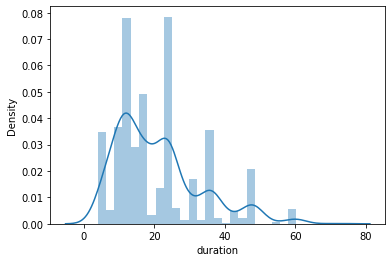

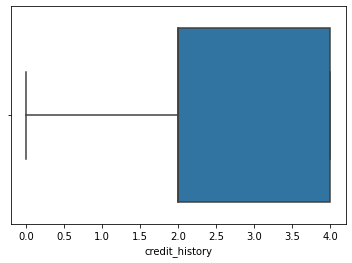

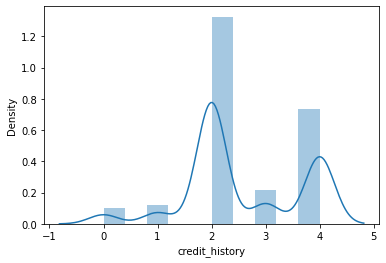

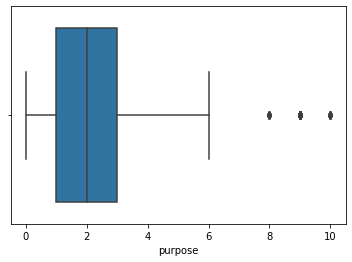

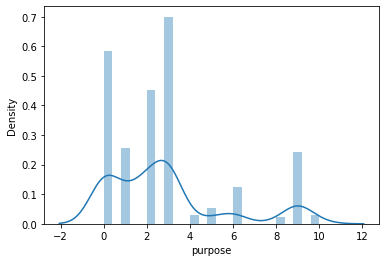

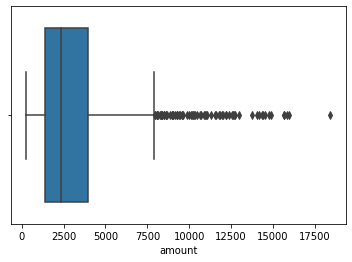

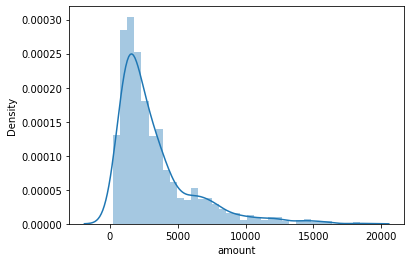

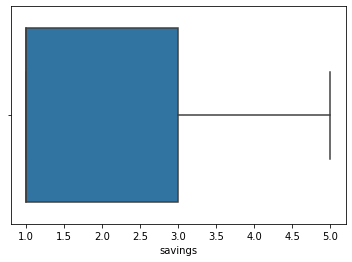

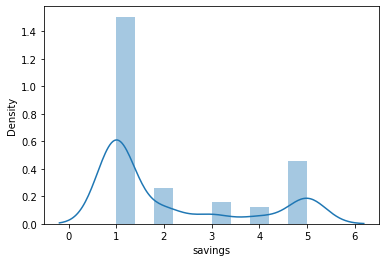

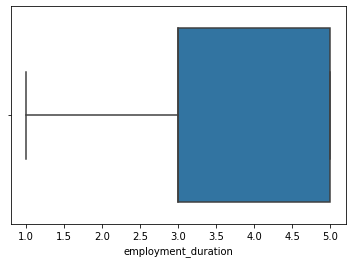

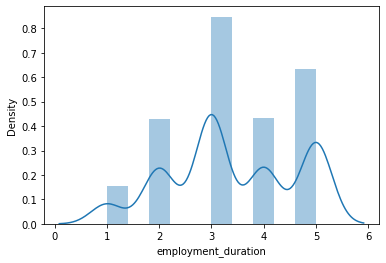

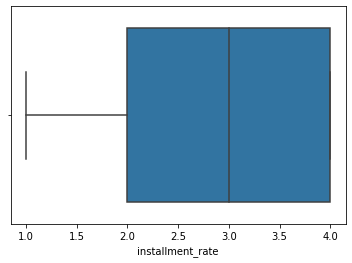

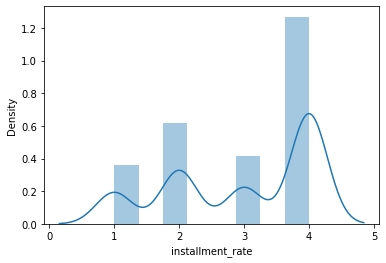

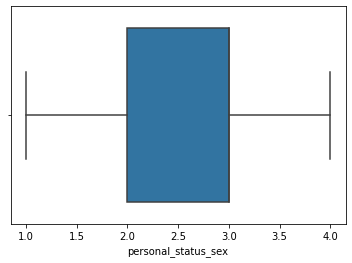

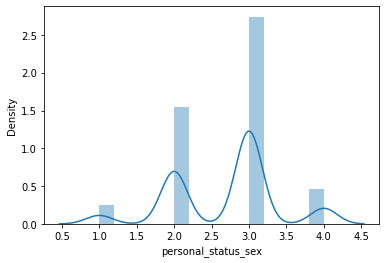

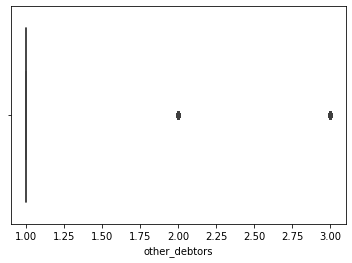

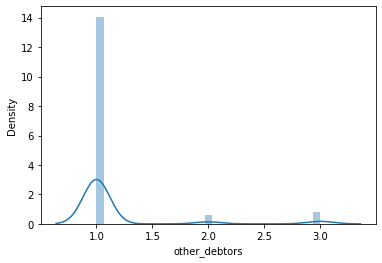

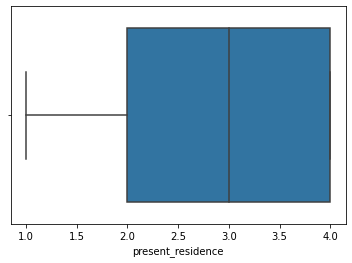

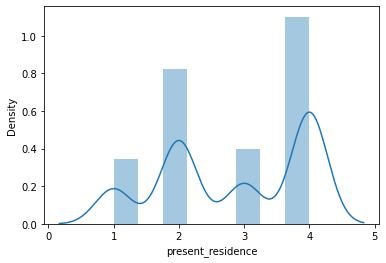

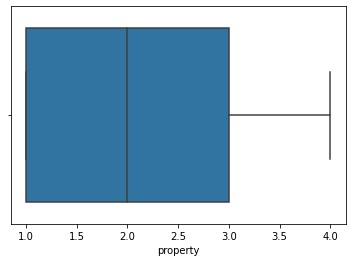

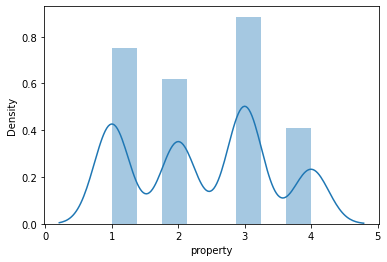

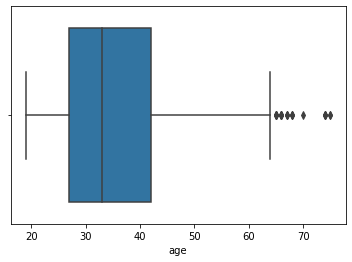

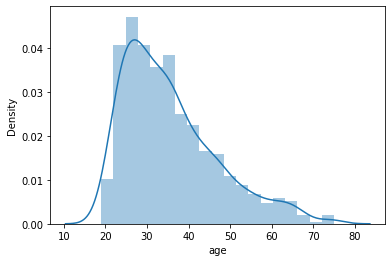

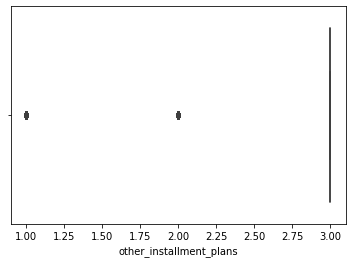

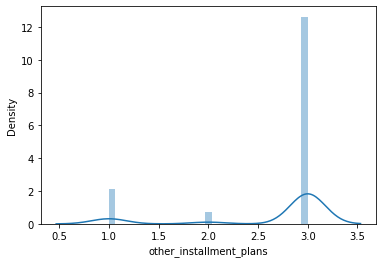

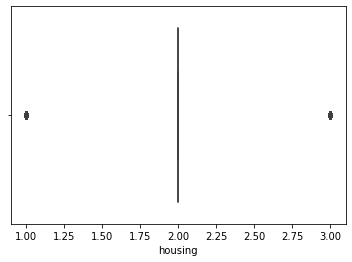

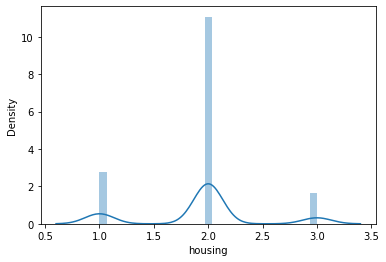

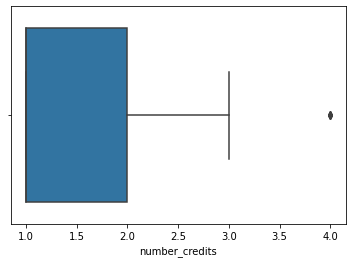

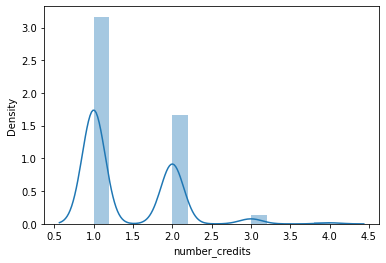

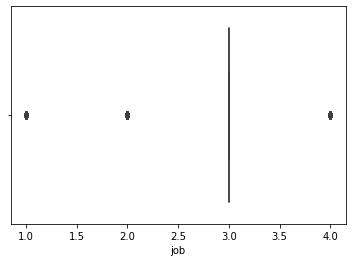

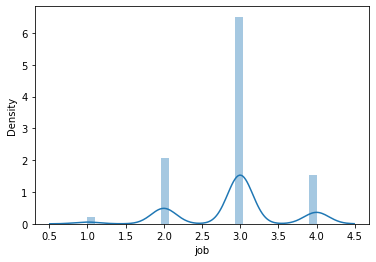

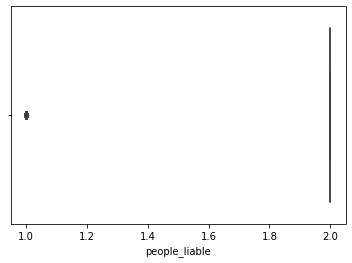

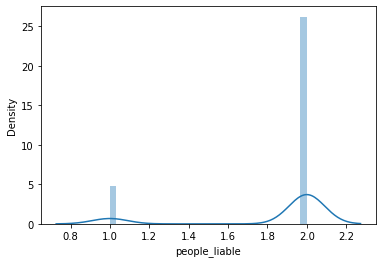

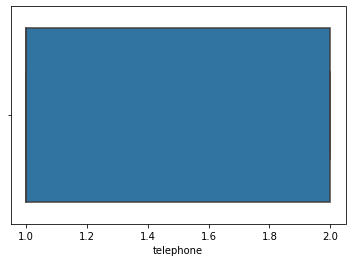

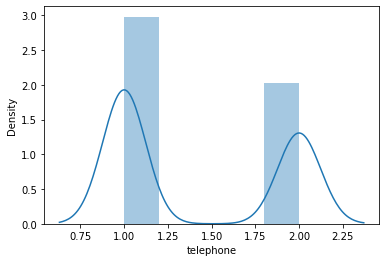

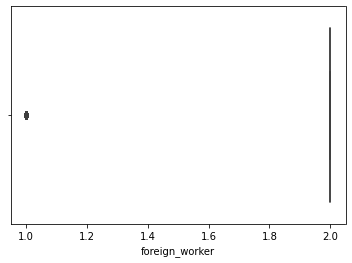

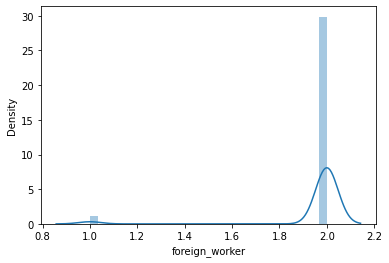

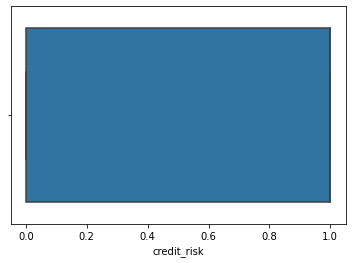

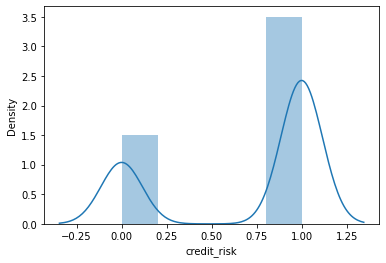

In [89]:
finding_outliers(dfn)

In [90]:
# dfn[list_cols] = np.where(((dfn[list_cols] - df[list_cols].mean()) /     dfn[list_cols].std()).abs() >= 3, dfn[list_cols].median(), dfn[list_cols])


In [91]:
# Q1 = dfn[x].quantile(0.25)
# Q3 = dfn[x].quantile(0.75)
# IQR = Q3 - Q1
# whisker_width = 1.5
# lower_whisker = Q1 -(whisker_width*IQR)
# upper_whisker = Q3 + whisker_width*IQR)
# df['Fare']=np.where(dfn[x]>upper_whisker,upper_whisker,np.where(dfn[x]<lower_whisker,lower_whisker,dfn[x]))

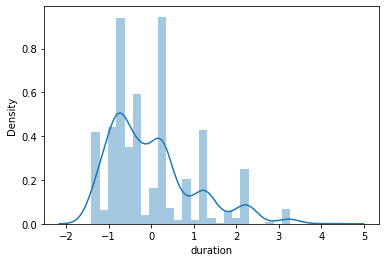

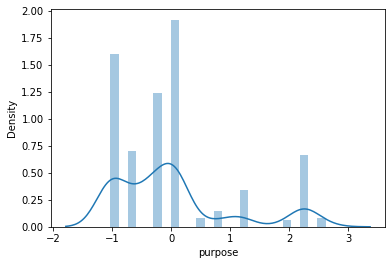

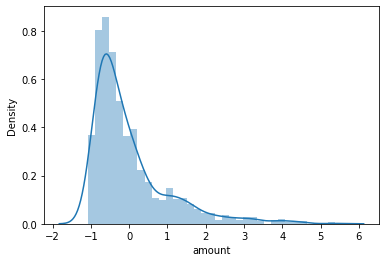

In [92]:
for x in list_cols:
    z_score=stats.zscore(dfn[x])
    sns.distplot(z_score)
    plt.show()

In [93]:
finding_z_score(dfn)

[0     -1.254566
 1     -1.254566
 2     -0.459026
 3     -1.254566
 4     -1.254566
          ...   
 995   -1.254566
 996   -1.254566
 997    1.132053
 998   -0.459026
 999   -1.254566
 Name: status, Length: 1000, dtype: float64]

In [94]:
def plot_heatmap(df):
    plt.figure(figsize=(15,8))
    sns.heatmap(df.corr(),annot=True,cmap="Blues")
    plt.show()

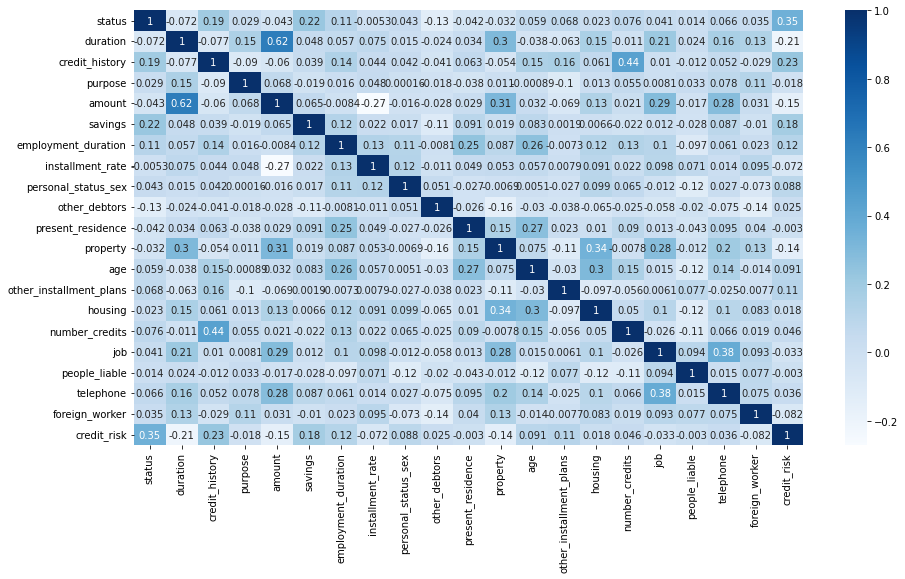

In [95]:
plot_heatmap(dfn)

# Observations from Heatmap
<!-As we can See from graph there is no higly correlated Value is exsisted i,e >0.95


In [96]:
# we will cross check the highly corrleated values by computing through corrleation Matrix
def remove_cols(col):
    dfn.drop([col],axis=1,inplace=True)

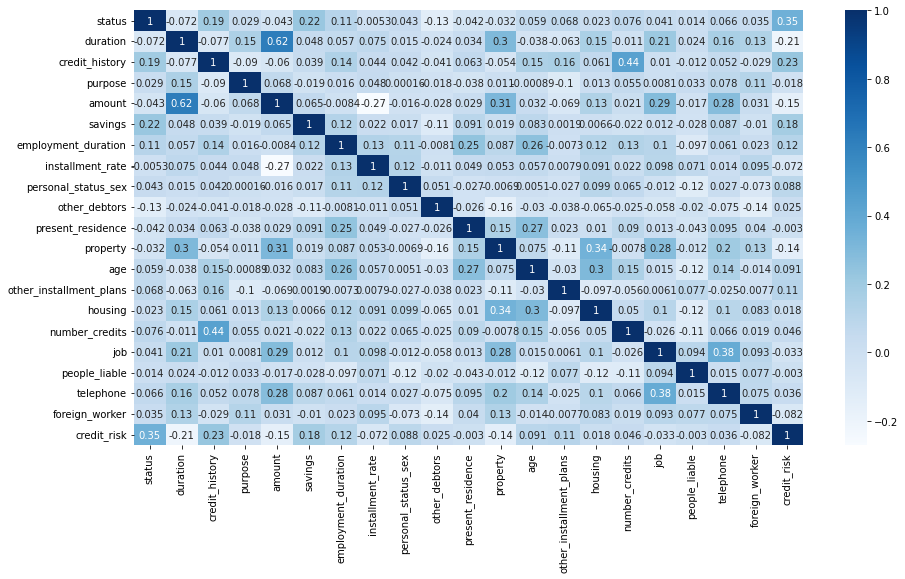

In [97]:
plot_heatmap(dfn)

In [98]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# VIF for Multicolinearity Among Varibles
<!-- Removing VIF values those greater than 10 -->

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list=[]
def vif_test(data):
    col_list = []
    for col in data.columns:
        if((data[col].dtype !='object') & (col !='credit_risk')):
            col_list.append(col)

    if not col_list:
        print("No numerical features found.")
        return

    X=data[col_list]
    vif_data=pd.DataFrame()
    vif_data['Feature']=X.columns
    vif_data['VIF']=[variance_inflation_factor(X.values,i) for i  in range(len(X.columns))]
    return vif_data.sort_values(by="VIF",ascending=False)

In [100]:
vif_test(dfn)

,Feature,VIF
19,foreign_worker,64.964650
16,job,26.997384
17,people_liable,25.797048
14,housing,18.338515
13,other_installment_plans,15.505605
8,personal_status_sex,14.948480
12,age,13.903737
18,telephone,11.723320
7,installment_rate,10.572226
6,employment_duration,10.564194


In [101]:
dfn=dfn.drop('foreign_worker',axis=1)

In [102]:
# dfn.drop('job',axis=1,inplace=True)

In [103]:
dfn.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [104]:
dfn.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [105]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso, Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV,ParameterGrid 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [106]:
# ! pip install xgboost

# Loading multiple models¶

In [107]:
# Loading mutliple machine learning models
models={"Logistic":LogisticRegression(),"Decision Tree":DecisionTreeClassifier(),"Random Forest":RandomForestClassifier()}

In [108]:
x=dfn.iloc[:,:-1]

In [109]:
x1=df.iloc[:,:-1]

In [110]:
y=dfn.iloc[:,-1]

In [111]:
y1=df.iloc[:,-1]


In [112]:
x.shape

(1000, 19)

In [113]:
y.shape

(1000,)

In [122]:
df.value_counts('credit_risk')

credit_risk
1    700
0    300
dtype: int64

In [154]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming x and y are the feature and target matrices, respectively
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a logistic regression classifier
# clf = LogisticRegression(random_state=42)
clf = RandomForestClassifier()


# Train on the unbalanced dataset
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate performance on the unbalanced dataset
print('Unbalanced dataset performance:')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train on the oversampled dataset
clf.fit(X_train_resampled, y_train_resampled)
# Predict probabilities instead of labels
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Adjust the decision threshold to balance precision and recall
threshold = 0.5  # default threshold
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate performance on the oversampled dataset
print('Oversampled dataset performance with adjusted threshold:')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Undersample the majority class using random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train on the undersampled dataset
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

# Evaluate performance on the undersampled dataset
print('Undersampled dataset performance:')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Unbalanced dataset performance:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53        62
           1       0.78      0.89      0.83       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

0.755
[[ 28  34]
 [ 15 123]]
Oversampled dataset performance with adjusted threshold:
              precision    recall  f1-score   support

           0       0.66      0.63      0.64        62
           1       0.84      0.86      0.85       138

    accuracy                           0.79       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.78      0.79      0.78       200

0.785
[[ 39  23]
 [ 20 118]]
Undersampled dataset performance:
              precision    recall  f1-score   support

           0       0.56      0.71      0.62        62
           1       0.85      0.75      0.80       138

 

In [156]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Create an ensemble of classifiers
clf1 = RandomForestClassifier(random_state=42)
clf2 = MLPClassifier(random_state=42)
clf3 = SVC(random_state=42, probability=True)
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('mlp', clf2), ('svc', clf3)])

# Train the ensemble on the oversampled dataset
voting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate performance
y_pred = voting_clf.predict(X_test)



# Evaluate performance on the undersampled dataset
print('Undersampled dataset performance:')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Undersampled dataset performance:
              precision    recall  f1-score   support

           0       0.51      0.71      0.59        62
           1       0.84      0.70      0.76       138

    accuracy                           0.70       200
   macro avg       0.68      0.70      0.68       200
weighted avg       0.74      0.70      0.71       200

0.7
[[44 18]
 [42 96]]


In [176]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# # Define the CNN model
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(19, 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='tanh'))
# model.add(Dense(32, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))


# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Reshape X_train and X_test to have a third dimension of 1 for the CNN input


# # Train the model on the CNN inputs
# model.fit(X_train, y_train, epochs=25, batch_size=32)

# # Evaluate performance on the CNN inputs
# loss, accuracy = model.evaluate(X_test, y_test)
# y_pred = model.predict(X_test)


In [177]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout

# # define the model
# model = Sequential()

# # add LSTM layer with 64 units
# model.add(LSTM(64, input_shape=(19,1)))

# # add dropout layer to avoid overfitting
# model.add(Dropout(0.2))

# # add dense layer with 1 output unit and sigmoid activation function

# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='tanh'))
# model.add(Dense(32, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))

# # compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # fit the model to the training data
# history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# # evaluate the model on the test data
# loss, accuracy = model.evaluate(X_test, y_test)

# # print the test accuracy
# print('Test accuracy:', accuracy)


In [147]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# assume X and y are the feature matrix and target vector, respectively
# where y contains class labels 0 and 1

# count the number of samples in each class
print("Original class distribution: ", Counter(y))

# create an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.44, random_state=42)

# perform undersampling on the data
X_resampled, y_resampled = rus.fit_resample(x, y)

# count the number of samples in each class after undersampling
print("Resampled class distribution: ", Counter(y_resampled))


Original class distribution:  Counter({1: 700, 0: 300})
Resampled class distribution:  Counter({1: 681, 0: 300})


# Feature Engineering mutual infotmation for Classification

In [48]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RepeatedStratifiedKFold

In [49]:
from sklearn.feature_selection import SelectKBest

In [50]:
from sklearn.model_selection import train_test_split

def data_spilt(x, y, test_size=0.20, random_state=42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test


In [51]:
len(df.columns)

21

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       182
           1       1.00      0.99      1.00       118

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

0.9966666666666667
[[182   0]
 [  1 117]]


In [53]:
data_spilt(x,y)

(array([[ 0.3441337 , -0.20815835, -4.59203296, ..., -1.50307636,
          4.35851161,  1.70063743],
        [ 0.642121  , -0.52489725, -6.62699665, ..., -1.9523455 ,
          1.93695042,  0.40557335],
        [ 0.14411636, -3.15020182, -2.98553639, ..., -1.45264972,
          2.70529074, -1.0024723 ],
        ...,
        [-0.5630662 ,  0.91982422, -6.61150416, ...,  0.93764615,
          1.55083183,  2.38821735],
        [ 0.53042346,  8.32747264,  4.04775796, ..., -1.97208414,
          2.67906784, -0.73048096],
        [-0.81602307, -3.11854071,  0.48848778, ..., -3.37249717,
          2.0532339 ,  1.72930978]]),
 array([[ -0.71813766,   1.74025246,  -1.28965368, ...,  -1.11644731,
          -4.66284715,  -2.25096397],
        [ -0.56697639,  -2.66065349,   1.91220859, ...,   0.09809027,
          -1.00194925,   3.58451806],
        [ -1.13633622,   1.73389952,  -3.57865199, ...,  -1.19681295,
          -0.0397866 ,   2.31902346],
        ...,
        [  0.40535417,   2.02847795,

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [55]:
# pip install -U imbalanced-learn

In [56]:
x_train, x_test, y_train, y_test = data_spilt(x, y)
selector = SelectKBest(score_func=f_regression, k=5)
print(x_train)
# Fit the selector to the training data and transform the data
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

[[ 0.3441337  -0.20815835 -4.59203296 ... -1.50307636  4.35851161
   1.70063743]
 [ 0.642121   -0.52489725 -6.62699665 ... -1.9523455   1.93695042
   0.40557335]
 [ 0.14411636 -3.15020182 -2.98553639 ... -1.45264972  2.70529074
  -1.0024723 ]
 ...
 [-0.5630662   0.91982422 -6.61150416 ...  0.93764615  1.55083183
   2.38821735]
 [ 0.53042346  8.32747264  4.04775796 ... -1.97208414  2.67906784
  -0.73048096]
 [-0.81602307 -3.11854071  0.48848778 ... -3.37249717  2.0532339
   1.72930978]]


In [57]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest, f_regression

# # Load the German credit risk dataset
# data = pd.read_csv('SouthGermanCredit.asc',sep=" ")
# new_cols=['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex'
#          ,'other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable',
#          'telephone','foreign_worker','credit_risk']
# for x,y in zip(data.columns,new_cols):
#     data.rename(columns={x:y},inplace=True)
    
# # Split the data into features and target
# x = data.drop('credit_risk', axis=1)

# # x=data.iloc[:,:-1]
# y = data['credit_risk']

# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# # Create a SelectKBest object with the f_regression scoring function
# selector = SelectKBest(score_func=f_regression, k=5)

# # Fit the selector to the training data and transform the data
# x_train_selected = selector.fit_transform(x_train, y_train)
# x_test_selected = selector.transform(x_test)

# # Train a linear regression model on the selected features
# model = LogisticRegression()
# model.fit(x_train_selected, y_train)
# score = model.score(x_test_selected, y_test)

# # Print the score
# print(f'R^2 score: {score:.2f}')


# feature scaling using the standardscalar 

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
def Scaling(x_train,x_test):
    Sc=StandardScaler()
    x_train=Sc.fit_transform(x_train)
    x_test=Sc.transform(x_test)
    return x_train,x_test

In [60]:
Scaling(x_train,x_test)

(array([[ 0.33814884, -0.01578742, -0.16695235, ...,  0.25024321,
          1.43222334,  0.44316402],
        [ 0.63263765, -0.1192729 , -0.53550238, ...,  0.05885519,
          0.55795358,  0.00401378],
        [ 0.14047978, -0.9770169 ,  0.12399847, ...,  0.27172489,
          0.83535178, -0.47344797],
        ...,
        [-0.55840018,  0.35274897, -0.53269655, ...,  1.28998759,
          0.41855103,  0.67631918],
        [ 0.52225148,  2.77298853,  1.39779063, ...,  0.05044655,
          0.82588438, -0.38121697],
        [-0.80838724, -0.96667252,  0.75317514, ..., -0.54612744,
          0.59993606,  0.45288668]]),
 array([[-0.71165104,  0.62080069,  0.43113791, ...,  0.41494665,
         -1.82480819, -0.89680571],
        [-0.56226447, -0.81707083,  1.01102365, ...,  0.93233796,
         -0.50309378,  1.08197921],
        [-1.12493979,  0.61872505,  0.01657995, ...,  0.380711  ,
         -0.15571882,  0.65285585],
        ...,
        [ 0.39865055,  0.71497021,  0.5466376 , ..., -

In [61]:
df['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

In [62]:

def call_algos(algo):
    # Train a classification model using the training data and labels
    if algo == 'logistic':
        model=LogisticRegression(penalty='l2')
#         model = XGBClassifier(base_estimator=model1, n_estimators=50, learning_rate=0.1)
#         xgb_model.fit(X_train, y_train)
#         model=LogisticRegression(penalty='l1',solver="saga")
#         penalty='l2', solver='liblinear'
#         model=LogisticRegression(C=0.03359818286283781, l1_ratio=0.21052631578947367,
#                    max_iter=1000, penalty='elasticnet', solver='saga')
#          model=LogisticRegression(penalty='l2')
#         lr = LogisticRegression(max_iter=1000)
#         param_grid = {
#             'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#             'C': np.logspace(-4, 4, 20),
#             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#             'l1_ratio': np.linspace(0, 1, 20)
#         }
#         model = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
#         model.fit(x_train, y_train)
    elif algo == 'tree':
       model = DecisionTreeClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,splitter= 'best')
    
            # Define the weak learner
#         dt = DecisionTreeClassifier(max_depth=1)

#         # Define the AdaBoost classifier
#         model = AdaBoostClassifier(base_estimator=dt, n_estimators=30)

        # Fit the model on the training data
#         abc.fit(X_train, y_train)

# {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}

#         model = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_leaf= 2, min_samples_split= 2, splitter= 'random')
#         grid_param={"criterion":["gini","entropy"],
#              "splitter":["best","random"],
# #              "max_depth":range(1,10,1),
#              "max_depth":range(1,10,1),
#              "min_samples_leaf":[1,2],
#              "min_samples_split":[2,3,4] 
#             }
#         model2=GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs=-1)
#         model2.fit(x_train, y_train)
#         print(model2.best_params_)
#         clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,splitter= 'best')
    elif algo == 'forest':
#         model = RandomForestClassifier()
        model = RandomForestClassifier(n_estimators=100)

# Evaluate the model using cross-validation
    elif algo == 'knn':
        model = KNeighborsClassifier()
    elif algo == 'xgb':
        model = xgb.XGBClassifier()
    else:
        print('Invalid algorithm')
        return
    Sc=StandardScaler()
    x_train_scaled=Sc.fit_transform(x_train)
    x_test_scaled=Sc.transform(x_test)
#     model = Lasso(alpha=0.1)
    
    model.fit(x_train_scaled, y_train)
#     best_model = model.best_estimator_
#     print(best_model)
#     ls = Ridge(alpha=0.1)
#     ls.fit(x_train_scaled, y_train)
    
    if 'df_res' not in globals():
        global df_res
        df_res=pd.DataFrame(columns=['Model_name','Accuracy','Precison','Recall','F1Score'])
    
    # Evaluate the performance of the model on the testing data
    y_pred = model.predict(x_test_scaled)
    y_train_pred = model.predict(x_train_scaled)
#     y_pred_lasso = ls.predict(x_test_scaled)
#     y_pred_lasso_bin = (y_pred_lasso > 0.5).astype(int)
#     accuracy_lasso = accuracy_score(y_test, y_pred_lasso_bin)
#     print('Accuracy with Lasso regularization:', accuracy_lasso)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend(loc="lower right")
#     plt.show()

    # Return the trained model and evaluation metrics
    
    df_res=df_res.append({'Model_name':model,'Accuracy':accuracy,'Train Accuracy':accuracy_train,'Precison':precision,'Recall': recall,'F1-Score':f1},ignore_index=True)
    df_res = df_res.drop_duplicates()
    return df_res.tail(5)


In [63]:
call_algos('forest')

[[122   0]
 [  0  78]]


,Model_name,Accuracy,Precison,Recall,F1Score,F1-Score,Train Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.0,1.0,1.0,NaN,1.0,1.0


In [64]:
call_algos('tree')

[[118   4]
 [  0  78]]


,Model_name,Accuracy,Precison,Recall,F1Score,F1-Score,Train Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.000000,1.00,NaN,1.000000,1.00000
1,DecisionTreeClassifier(max_depth=4),0.98,0.980976,0.98,NaN,0.980083,0.99375


In [65]:
call_algos('forest')

[[122   0]
 [  0  78]]


,Model_name,Accuracy,Precison,Recall,F1Score,F1-Score,Train Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.000000,1.00,NaN,1.000000,1.00000
1,DecisionTreeClassifier(max_depth=4),0.98,0.980976,0.98,NaN,0.980083,0.99375
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.000000,1.00,NaN,1.000000,1.00000


In [66]:
df_res

,Model_name,Accuracy,Precison,Recall,F1Score,F1-Score,Train Accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.000000,1.00,NaN,1.000000,1.00000
1,DecisionTreeClassifier(max_depth=4),0.98,0.980976,0.98,NaN,0.980083,0.99375
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.000000,1.00,NaN,1.000000,1.00000


In [67]:
confusion_matrix()

TypeError: confusion_matrix() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [ ]:
def call_model(model_name):
    model=model_name
    model.fit(x_train,y_train)
    test_prediction=model.predict(x_test)
    train_prediction=model.predict(x_train)
#     return prediction
    precision = precision_score(y_test, test_prediction)
    recall = recall_score(y_test, test_prediction)
    f1 = f1_score(y_test, test_prediction)
    fpr, tpr, thresholds = roc_curve(y_test, test_prediction)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 score: {:.2f}".format(f1))
    return 'Accuracy_Test_score',accuracy_score(y_test, test_prediction),'Accuracy_Train_score',accuracy_score(y_train, train_prediction),'Confusion_matrix',confusion_matrix(y_test,test_prediction)
#     return 'Accuracy_Train_score',accuracy_score(y_train, train_prediction)

In [ ]:
data_spilt(xn,yn)

In [ ]:
call_model(LogisticRegression())

In [ ]:
print(xn.shape,yn.shape)

In [ ]:
call_model(RandomForestClassifier())

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))

In [ ]:


# Create and train Lasso classification model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Create and train Ridge classification model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions on test data
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)

# Convert predictions to binary
lasso_pred_bin = [1 if x >= 0.6 else 0 for x in lasso_pred]
ridge_pred_bin = [1 if x >= 0.6 else 0 for x in ridge_pred]

# Evaluate accuracy of Lasso and Ridge models
lasso_acc = accuracy_score(y_test, lasso_pred_bin)
ridge_acc = accuracy_score(y_test, ridge_pred_bin)

print('Lasso Accuracy:', lasso_acc)
print('Ridge Accuracy:', ridge_acc)


In [ ]:
confusion_matrix(y_test)

In [ ]:
confusion_matrix(y_test,test_prediction)

In [ ]:
def confusion_matrix()

In [ ]:
classifier1 = RandomForestClassifier()
classifier1.fit(x_train, y_train)
classifier1.fit(x1_train, y1_train)
y_pred = classifier1.predict(x_test)
y_pred1 = classifier1.predict(x1_test)

In [ ]:
a1=accuracy_score(y_test, y_pred)
a2=accuracy_score(y1_test, y_pred1)
print(a1)
print(a2)

In [ ]:
c1=confusion_matrix(y1_test,y_pred1)
print(c1)

In [ ]:
grid_param={"criterion":["gini","entropy"],
#              "splitter":["best","random"],
#              "max_depth":range(1,10,1),
             "max_depth":range(2,12,2),
             "n_estimators":range(100,500,100)
#              "min_samples_split":[2,3,4] 
            }
grid_search=GridSearchCV(estimator=classifier1,param_grid=grid_param,verbose=10,scoring="accuracy",cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
clf=RandomForestClassifier(criterion= 'gini',max_depth= 10,n_estimators= 400)
clf.fit(x_train,y_train)

In [ ]:
y_predicted=clf.predict(x_test)
accuracy_score(y_test,y_predicted)

In [ ]:
y_pred_xg=modelxg.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_xg)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

In [ ]:
model1 = abc.fit(x_train, y_train)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
svc=SVC(probability=True, kernel='linear')


In [ ]:
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)

In [ ]:
model2 = abc.fit(x_train, y_train)

In [ ]:
y_pred11 = model2.predict(x_test)

In [ ]:
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred11))


# DecisionTreeClassifier with GridSearch Cv

In [ ]:
clf=DecisionTreeClassifier(random_state=0)

In [ ]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
#              "max_depth":range(1,10,1),
             "max_depth":range(2,12,2),
             "min_samples_leaf":[1,2],
             "min_samples_split":[2,3,4] 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,splitter= 'best')
clf.fit(x_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [ ]:
y_predicted=clf.predict(x_test)
accuracy_score(y_test,y_predicted)

In [ ]:
cm=confusion_matrix(y_test,clf.predict(x_test))
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity %.4f: '% sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity %.4f: '% specificity1)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
plt.show()

In [ ]:
lgr=LogisticRegression()

In [ ]:
lgr.fit(x_train,y_train)
y_test_pred=lgr.predict(x_test)

In [ ]:
accuracy_score(y_test_pred,y_test)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(lgr, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [ ]:
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l2']
space['C'] = [0.01]
# define search
search1 = GridSearchCV(lgr, space, scoring='accuracy', n_jobs=-1, cv=cv)

In [ ]:
result = search1.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
cm=confusion_matrix(y_test_pred,y_test)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity %.4f: '% sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity %.4f: '% specificity1)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
plt.show()

In [ ]:
proba=pd.DataFrame(lgr.predict_proba(x_test)[:,1])
proba

In [ ]:
df_new=pd.DataFrame({"Predictions":y_test_pred})
df_new

In [ ]:
df_new.insert(1, "predict_proba",proba)
df_new

In [ ]:
df_new.isna().sum()

In [ ]:
df_new['predict_proba_0.1']=np.where((df_new['predict_proba']>0.1),1,0)
df_new['predict_proba_0.2']=np.where(df_new['predict_proba']>0.2,1,0)
df_new['predict_proba_0.3']=np.where(df_new['predict_proba']>0.3,1,0)
df_new['predict_proba_0.4']=np.where(df_new['predict_proba']>0.4,1,0)
df_new['predict_proba_0.5']=np.where(df_new['predict_proba']>0.5,1,0)
df_new['predict_proba_0.6']=np.where(df_new['predict_proba']>0.6,1,0)
df_new['predict_proba_0.7']=np.where(df_new['predict_proba']>0.7,1,0)
df_new['predict_proba_0.8']=np.where(df_new['predict_proba']>0.8,1,0)
df_new['predict_proba_0.9']=np.where(df_new['predict_proba']>0.9,1,0)
df_new

In [ ]:
c1=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.1'])
c2=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.2'])
c3=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.3'])
c4=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.4'])
c5=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.5'])
c6=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.6'])
c7=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.7'])
c8=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.8'])
c9=confusion_matrix(df_new.loc[:,'Predictions'],df_new.loc[:,'predict_proba_0.9'])

In [ ]:
sen1=c1[0,0]/(c1[0,0]+c1[0,1])
sen2=c2[0,0]/(c2[0,0]+c2[0,1])
sen3=c3[0,0]/(c3[0,0]+c3[0,1])
sen4=c4[0,0]/(c4[0,0]+c4[0,1])
sen5=c5[0,0]/(c5[0,0]+c5[0,1])
sen6=c6[0,0]/(c6[0,0]+c6[0,1])
sen7=c7[0,0]/(c7[0,0]+c7[0,1])
sen8=c8[0,0]/(c8[0,0]+c8[0,1])
sen9=c9[0,0]/(c9[0,0]+c9[0,1])

In [ ]:
sep1=c1[1,1]/(c1[1,1]+c1[1,0])
sep2=c2[1,1]/(c2[1,1]+c2[1,0])
sep3=c3[1,1]/(c3[1,1]+c3[1,0])
sep4=c4[1,1]/(c4[1,1]+c4[1,0])
sep5=c5[1,1]/(c5[1,1]+c5[1,0])
sep6=c6[1,1]/(c6[1,1]+c6[1,0])
sep7=c7[1,1]/(c7[1,1]+c7[1,0])
sep8=c8[1,1]/(c8[1,1]+c8[1,0])
sep9=c9[1,1]/(c9[1,1]+c9[1,0])

In [ ]:
d_cutoff_value=pd.DataFrame(columns=['cutoff','Sensitivity','Specificity'])
d_cutoff_value

In [ ]:
d_cutoff_value=d_cutoff_value.append({'cutoff':0.1, 'Sensitivity': sen1,'Specificity':sep1}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.2, 'Sensitivity': sen2,'Specificity':sep2}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.3, 'Sensitivity': sen3,'Specificity':sep3}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.4, 'Sensitivity': sen4,'Specificity':sep4}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.5, 'Sensitivity': sen5,'Specificity':sep5}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.6, 'Sensitivity': sen6,'Specificity':sep6}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.7, 'Sensitivity': sen7,'Specificity':sep7}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.8, 'Sensitivity': sen8,'Specificity':sep8}, ignore_index=True)
d_cutoff_value=d_cutoff_value.append({'cutoff':0.9, 'Sensitivity': sen9,'Specificity':sep9}, ignore_index=True)
d_cutoff_value

In [ ]:
# will take 0.5 as Cutoff because both sensitivity and Specitivity are maximum

In [ ]:
test_pred_probar=lgr.predict_proba(x_test)
test_pred_probar

In [ ]:
# calculate scores->how much data has been understood by the model
auc = roc_auc_score(np.array(y_test), test_pred_probar[:, 1])

# summarize scores

print('Logistic: ROC AUC=%.3f' % (auc))

# calculate roc curves

fpr, tpr, threshold = roc_curve(np.array(y_test), test_pred_probar[:, 1])
# plot the roc curve for the model

plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
df_new.columns

In [ ]:
df_new[df_new['Predictions']==1].shape

In [ ]:
for i in range(300):
    if(df_new.loc[i,'Predictions']==1 and df_new.loc[i,'predict_proba_0.5']==1):
        df_new.loc[i,'Label']='TP'
    elif(df_new.loc[i,'Predictions']==0 and df_new.loc[i,'predict_proba_0.5']==1):
        df_new.loc[i,'Label']='FN'
    elif(df_new.loc[i,'Predictions']==1 and df_new.loc[i,'predict_proba_0.5']==0):
        df_new.loc[i,'Label']='FP'
    elif(df_new.loc[i,'Predictions']==0 and df_new.loc[i,'predict_proba_0.5']==0):
        df_new.loc[i,'Label']='TN'

In [ ]:
df_new[df_new['Label']=='TP'].shape

In [ ]:
df_new[['Predictions','predict_proba_0.5','Label']]

In [ ]:
test_class_report=classification_report(df_new[['Predictions']],df_new[['predict_proba_0.5']])
print(test_class_report)

In [ ]:
cm=confusion_matrix(df_new[['Predictions']],df_new[['predict_proba_0.5']])
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
plt.show()

In [ ]:
seed=7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=seed)

In [ ]:
modelxg=XGBClassifier()
modelxg.fit(x_train,y_train)

In [ ]:
y_pred_xg=modelxg.predict(x_test)

In [ ]:
accxg=accuracy_score(y_test,y_pred_xg)
print(accxg)

In [ ]:
# # calculate scores->how much data has been understood by the model
# auc = roc_auc_score(np.array(y_test), df_new.iloc[:,-1])

# # summarize scores

# print('Logistic: ROC AUC=%.3f' % (auc))

# # calculate roc curves

# fpr, tpr, threshold = roc_curve(np.array(y_test), df_new.iloc[:,-1])
# # plot the roc curve for the model

# plt.plot(fpr, tpr, marker='.', label='Logistic')
# # axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # show the legend
# plt.legend()
# # show the plot
# plt.show()

# Model Accuracy(with Feature Engineering)

In [ ]:
accuracy_feat_engin=pd.DataFrame()
for x in range(len(list(models))):
    model=list(models.values())[x]
    model.fit(x_train,y_train)
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
#     if(list(models.keys())[x]=='Random Forest'):
#         y_pred_final=model.predict(df_test)
#         submission=pd.DataFrame({'credit_risk':y_pred_final},index=df_test.PassengerId)
#         submission.head()
    
    
#     print("--------------Scores of Training-------------")
#     train_accuracy=accuracy_score(y_train_pred,y_train)
#     train_class_report=classification_report(y_train_pred,y_train)
#     print(list(models.keys())[x])
#     print("Classification Report",train_class_report)
#     print("accuracy",train_accuracy)
#     print('roc_auc_score: ', roc_auc_score(y_train_pred, y_train))
#     fpr_train, tpr_train, _ = roc_curve(y_train,  y_train_pred)
#      #create ROC curve
#     plt.plot(fpr_train,tpr_train)
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
#     accuracy_list=[]
    print("--------------Scores of Testing-------------")
    test_accuracy=accuracy_score(y_test_pred,y_test)
#     accuracy_df1['accuracy']=test_accuracy
#     accuracy_df1['Model_name']=list(models.keys())[x]
#     accuracy_list.append(test_accuracy)
#     accuracy_list.sort()
    test_class_report=classification_report(y_test_pred,y_test)
    print(list(models.keys())[x])
    print("Report",test_class_report)
    print("accuracy %.4f" % test_accuracy)
    print('roc_auc_score %.4f: '% roc_auc_score(y_test_pred, y_test))
    cm=confusion_matrix(y_test,y_test_pred)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity %.4f: '% sensitivity1 )

    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    accuracy_feat_engin = accuracy_feat_engin.append({'accuracy_Feat_enginer' : test_accuracy, 'Model_name' : list(models.keys())[x],'Sensitivity' : sensitivity1,'Specificity' : specificity1},ignore_index = True)
    print('Specificity %.4f: '% specificity1)
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
    plt.show()
#     print(accuracy_list)
    
    


    #create ROC curve
    fpr,tpr, _ = roc_curve(y_test_pred,y_test)
    plt.plot(fpr,tpr,marker='.')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
accuracy_feat_engin.sort_values(by="accuracy_Feat_enginer",ascending=False).reset_index(drop=True)
# print("highest Accuracy",accuracy_list[-1])

# Model Accuracy(with out Feature Engineering)

In [ ]:
accuracy_df=pd.DataFrame()
for x in range(len(list(models))):
    model=list(models.values())[x]
    model.fit(x1_train,y1_train)
    
    y1_train_pred=model.predict(x1_train)
    y1_test_pred=model.predict(x1_test)
#     if(list(models.keys())[x]=='Random Forest'):
#         y_pred_final=model.predict(df_test)
#         submission=pd.DataFrame({'credit_risk':y_pred_final},index=df_test.PassengerId)
#         submission.head()
    
    
#     print("--------------Scores of Training-------------")
#     train_accuracy=accuracy_score(y_train_pred,y_train)
#     train_class_report=classification_report(y_train_pred,y_train)
#     print(list(models.keys())[x])
#     print("Classification Report",train_class_report)
#     print("accuracy",train_accuracy)
#     print('roc_auc_score: ', roc_auc_score(y_train_pred, y_train))
#     fpr_train, tpr_train, _ = roc_curve(y_train,  y_train_pred)
#      #create ROC curve
#     plt.plot(fpr_train,tpr_train)
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
    
#     list(models.keys())[x]=model_name
    print("--------------Scores of Testing-------------")
    test_accuracy=accuracy_score(y1_test_pred,y1_test)
    
#     accuracy_df['accuracy']=test_accuracy
#     accuracy_df['Model_name']=list(models.keys())[x]
#     accuracy_list.sort()
    test_class_report=classification_report(y1_test_pred,y1_test)
    print(list(models.keys())[x])
    print("Report",test_class_report)
    print("accuracy %.4f" % test_accuracy)
    print('roc_auc_score %.4f: '% roc_auc_score(y1_test_pred, y1_test))
    cm=confusion_matrix(y_test,y_test_pred)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity %.4f: '% sensitivity1 )

    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    accuracy_df = accuracy_df.append({'accuracy_no_featr' : test_accuracy, 'Model_name' : list(models.keys())[x],'Sensitivity' : sensitivity1,'Specificity' : specificity1},ignore_index = True)
    print('Specificity %.4f: '% specificity1)
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
    plt.show()
    print(accuracy_df)
    
    


    #create ROC curve
    fpr,tpr, _ = roc_curve(y1_test_pred,y1_test)
    plt.plot(fpr,tpr,marker='.')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
accuracy_df.sort_values(by="accuracy_no_featr",ascending=False).reset_index(drop=True)
# print("highest Accuracy",accuracy_df)

In [ ]:
accuracy_feat_engin.sort_values(by="accuracy_Feat_enginer",ascending=False).reset_index(drop=True)


In [ ]:
x

In [ ]:
# c_parameter_name = 'max_depth'
# c_parameter_values = [1,2,3,4,5,6,7,8]
# dfpr = pd.DataFrame(columns=['max_depth', 'accuracy'])
# dfpr

In [ ]:
# for input_parameter in c_parameter_values:
#     model = tree.DecisionTreeClassifier(max_depth=input_parameter)
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     acc_score = accuracy_score(y_test,y_pred)*100
#     dfpr= dfpr.append({'max_depth' : input_parameter , 'accuracy' : acc_score}, ignore_index=True) 
# dfpr.sort_values(by="accuracy",ascending=False)

<!-- # accurcay is more when depth is 8  -->

In [ ]:
# modeldt = tree.DecisionTreeClassifier(max_depth=6)
# modeldt.fit(x_train, y_train)
# y_pred = modeldt.predict(x_test)
# acc_score = accuracy_score(y_test,y_pred)*100
# acc_score

In [ ]:
# cmtr=confusion_matrix(y_test,y_pred)
# sns.heatmap(cmtr,annot=True,cmap="Blues",fmt="g")

In [ ]:
# plt.figure(figsize=(30,20))
# tree.plot_tree(modeldt,filled=True)

In [ ]:
# max_depth=model.get_depth()
# max_depth

# improve the Performance of the Models
1)Decision Tree Classifier(with Post-Pruning Technique)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
ccp_alphas=model.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
ccp_alphas

In [ ]:
ccp_alphas1=model.cost_complexity_pruning_path(x1_train,y1_train)['ccp_alphas']
ccp_alphas1

In [ ]:
ccp_alpha_grid_search=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                  scoring=make_scorer(accuracy_score),
                                  param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas]}),
                                  )

In [ ]:
ccp_alpha_grid_search1=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                  scoring=make_scorer(accuracy_score),
                                  param_grid=ParameterGrid({"ccp_alpha":[[alpha] for alpha in ccp_alphas1]}),
                                  )

In [ ]:
ccp_alpha_grid_search.fit(x_train, y_train)


In [ ]:
ccp_alpha_grid_search1.fit(x1_train, y1_train)

In [ ]:
ccp_alpha_grid_search.best_params_

In [ ]:
ccp_alpha_grid_search1.best_params_

In [ ]:
best_ccp_alpha_tree=ccp_alpha_grid_search.best_estimator_
best_ccp_alpha_tree1=ccp_alpha_grid_search1.best_estimator_

In [ ]:
plt.figure(figsize=(30,20))
# tree.plot_tree(best_ccp_alpha_tree,feature_names=feature_names,class_names=class_names,filled=True)
tree.plot_tree(best_ccp_alpha_tree,filled=True)
plt.show()

In [ ]:
plt.figure(figsize=(30,20))
# tree.plot_tree(best_ccp_alpha_tree,feature_names=feature_names,class_names=class_names,filled=True)
tree.plot_tree(best_ccp_alpha_tree1,filled=True)
plt.show()

In [ ]:
print(classification_report(y_test,best_ccp_alpha_tree.predict(x_test)))

In [ ]:
print(classification_report(y1_test,best_ccp_alpha_tree1.predict(x1_test)))

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity %.4f: '% sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity %.4f: '% specificity1)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
plt.show()

In [ ]:
cm=confusion_matrix(y_test,best_ccp_alpha_tree.predict(x_test))
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity %.4f: '% sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity %.4f: '% specificity1)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="g")
plt.show()

In [ ]:
accuracy_feat_engin.sort_values(by="accuracy_Feat_enginer",ascending=False).reset_index(drop=True)


In [ ]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
#              "max_depth":range(1,10,1),
             "max_depth":range(2,12,2),
             "min_samples_leaf":[1,2],
             "min_samples_split":[2,3,4] 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth= 6,min_samples_leaf= 1,min_samples_split= 4,splitter= 'random')
clf.fit(x_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [ ]:
y_predicted=clf.predict(x_test)
accuracy_score(y_test,y_predicted)

In [ ]:
# dtclf = DecisionTreeClassifier(random_state=42)
# dtclf.fit(x_train, y_train)
# y_pred = dtclf.predict(x_test) # Predictions


In [ ]:
# hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
#                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
#                         'min_samples_split':[1,2,3,4,5,6,8,10]}


In [ ]:
# rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
#                         n_iter=10, scoring="accuracy", random_state=0,
#                         n_jobs=-1, cv=10, return_train_score=True)

In [ ]:
# import time
# start = time.time()

# rs.fit(x_train, y_train)
# print("Optimal hyperparameter combination:", rs.best_params_)
# print()
# print("Mean cross-validated training accuracy score:",
#       rs.best_score_)
# rs.best_estimator_.fit(x_train, y_train)
# y_pred = rs.best_estimator_.predict(x_test) # Predictions
# y_true = y_test # True values

# print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))
# cf_matrix = confusion_matrix(y_test, y_pred)
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.heatmap(cf_matrix, annot=True, cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')

# end = time.time()
# diff = end - start
# print('Execution time of Random Search (in Seconds):', diff)
# print()

Clearly Feature Engineering Model has higher Acccuracy than Raw Model